In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
sqrls = pd.read_csv('dataframes/bfsqrls.csv')

In [8]:
sqrls = sqrls.drop(columns='Unnamed: 0')

In [9]:
sqrls

,approaches,indifferent,runs_from,running,chasing,climbing,eating,foraging,kuks,quaas,moans,tail_flags,tail_twitches,nearbuilding,neargarden,neargrass,nearpedestrian,nearwater,nearwoods
0,0,0,1,1,0,0,0,0,0,0,0,0,0,False,False,False,False,True,True
1,0,0,1,0,0,1,0,0,0,0,0,0,0,False,False,True,False,False,False
2,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,True,False,False,False
3,0,0,1,0,0,0,0,1,0,0,0,0,0,False,False,False,False,True,False
4,0,0,0,0,0,0,0,1,0,0,0,0,0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,0,1,0,0,0,0,1,0,0,0,0,0,0,False,False,True,False,False,False
1749,0,0,1,0,1,0,0,0,0,0,0,0,1,False,False,True,False,False,False
1750,0,1,0,0,0,1,1,0,1,0,0,0,0,False,False,False,False,True,False
1751,0,1,0,0,0,0,1,1,0,0,0,0,0,False,False,False,False,False,True


In [45]:
sqrls['foraging'].value_counts(normalize=True)

0    0.513406
1    0.486594
Name: foraging, dtype: float64

### indifferent, nearwater, neargrass (test 1)

In [53]:
indifferent = sqrls[['indifferent', 'nearwater', 'neargrass']]
grouped = indifferent.groupby(indifferent['indifferent']).sum()
grouped

,nearwater,neargrass
indifferent,,
0,200,368
1,242,272


In [54]:
grouped = grouped.divide(grouped.sum(axis=0), axis=1)
grouped

,nearwater,neargrass
indifferent,,
0,0.452489,0.575
1,0.547511,0.425


In [55]:
observed_stat = abs(grouped.loc[1][1] - grouped.loc[1][0])
observed_stat

0.12251131221719463

In [56]:
shuffled = indifferent['indifferent'].sample(frac=1).reset_index(drop=True)
shuffled_df = indifferent.assign(**{'shuffled indifferent': shuffled})
shuffled_df

,indifferent,nearwater,neargrass,shuffled indifferent
0,0,True,False,0
1,0,False,True,1
2,0,False,True,0
3,0,True,False,0
4,0,True,False,0
...,...,...,...,...
1748,1,False,True,1
1749,0,False,True,1
1750,1,True,False,0
1751,1,False,False,1


In [57]:
shuffled_grouped = shuffled_df.groupby('shuffled indifferent').sum()
shuffled_grouped = shuffled_grouped.divide(shuffled_grouped.sum(axis=0), axis=1)
shuffled_grouped

,indifferent,nearwater,neargrass
shuffled indifferent,,,
0,0.529277,0.468326,0.498437
1,0.470723,0.531674,0.501563


In [58]:
shuffled_stat = abs(shuffled_grouped.loc[1][2] - shuffled_grouped.loc[1][1])
shuffled_stat

0.030111708144796356

In [59]:
stats = np.array([])

for i in range(10000):
    shuffled = indifferent['indifferent'].sample(frac=1).reset_index(drop=True)
    shuffled_df = indifferent.assign(**{'shuffled indifferent': shuffled})
    shuffled_grouped = shuffled_df.groupby('shuffled indifferent').sum()
    shuffled_grouped = shuffled_grouped.divide(shuffled_grouped.sum(axis=0), axis=1)
    shuffled_stat = abs(shuffled_grouped.loc[1][2] - shuffled_grouped.loc[1][1])
    stats = np.append(stats, shuffled_stat)

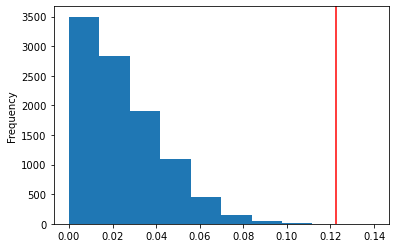

In [60]:
pd.Series(stats).plot(kind='hist')
plt.axvline(observed_stat, color = 'red')

In [61]:
np.mean(stats >= observed_stat)

0.0001

### indifferent, nearwater, nearwoods

In [71]:
indifferent = sqrls[['indifferent', 'nearwater', 'nearwoods']]
grouped = indifferent.groupby(indifferent['indifferent']).sum()
grouped = grouped.divide(grouped.sum(axis=0), axis=1)
observed_stat = abs(grouped.loc[1][1] - grouped.loc[1][0])

stats = np.array([])

for i in range(10000):
    shuffled = indifferent['indifferent'].sample(frac=1).reset_index(drop=True)
    shuffled_df = indifferent.assign(**{'shuffled indifferent': shuffled})
    shuffled_grouped = shuffled_df.groupby('shuffled indifferent').sum()
    shuffled_grouped = shuffled_grouped.divide(shuffled_grouped.sum(axis=0), axis=1)
    shuffled_stat = abs(shuffled_grouped.loc[1][2] - shuffled_grouped.loc[1][1])
    stats = np.append(stats, shuffled_stat)

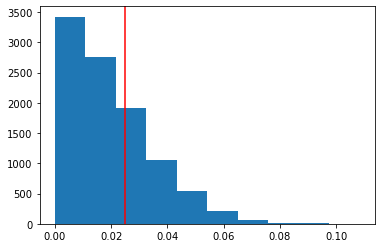

In [72]:
# pd.Series(stats).plot(kind='hist')
plt.hist(stats)
plt.axvline(observed_stat, color = 'red')

In [52]:
np.mean(stats >= observed_stat)

0.3293

### runs_from, nearwater, neargrass

In [63]:
runs_from = sqrls[['runs_from', 'nearwater', 'neargrass']]
grouped = runs_from.groupby(runs_from['runs_from']).sum()
grouped = grouped.divide(grouped.sum(axis=0), axis=1)
observed_stat = abs(grouped.loc[1][1] - grouped.loc[1][0])

stats = np.array([])

for i in range(10000):
    shuffled = runs_from['runs_from'].sample(frac=1).reset_index(drop=True)
    shuffled_df = runs_from.assign(**{'shuffled runs_from': shuffled})
    shuffled_grouped = shuffled_df.groupby('shuffled runs_from').sum()
    shuffled_grouped = shuffled_grouped.divide(shuffled_grouped.sum(axis=0), axis=1)
    shuffled_stat = abs(shuffled_grouped.loc[1][2] - shuffled_grouped.loc[1][1])
    stats = np.append(stats, shuffled_stat)

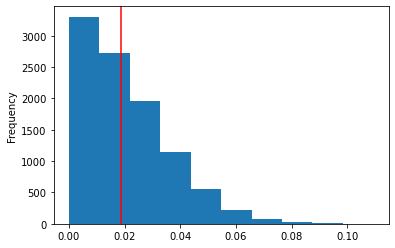

In [64]:
pd.Series(stats).plot(kind='hist')
plt.axvline(observed_stat, color = 'red')

In [65]:
np.mean(stats >= observed_stat)

0.4721

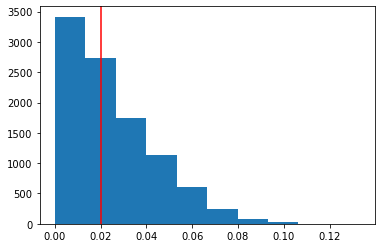

['approaches', 'nearbuilding', 'neargarden', 0.526]
_____________________________________________


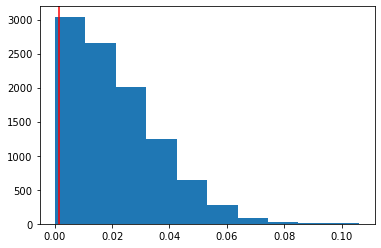

['approaches', 'nearbuilding', 'neargrass', 0.973]
_____________________________________________


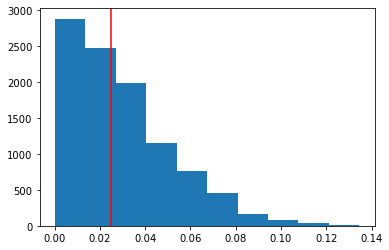

['approaches', 'nearbuilding', 'nearpedestrian', 0.4921]
_____________________________________________


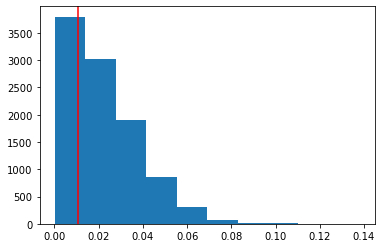

['approaches', 'nearbuilding', 'nearwater', 0.7004]
_____________________________________________


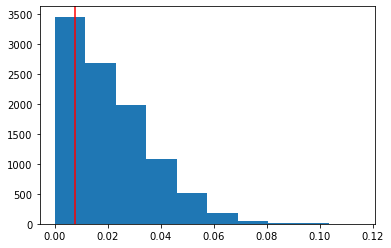

['approaches', 'nearbuilding', 'nearwoods', 0.7786]
_____________________________________________


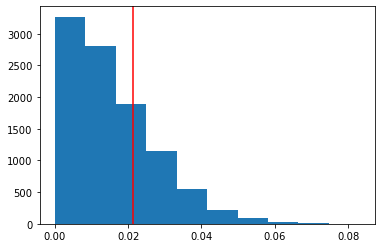

['approaches', 'neargarden', 'neargrass', 0.2793]
_____________________________________________


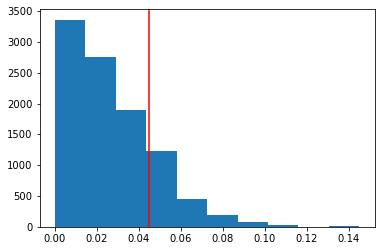

['approaches', 'neargarden', 'nearpedestrian', 0.1832]
_____________________________________________


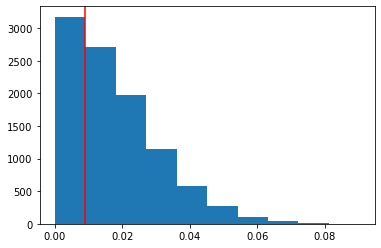

['approaches', 'neargarden', 'nearwater', 0.6826]
_____________________________________________


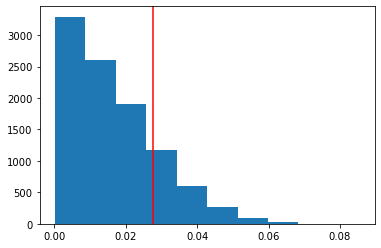

['approaches', 'neargarden', 'nearwoods', 0.1865]
_____________________________________________


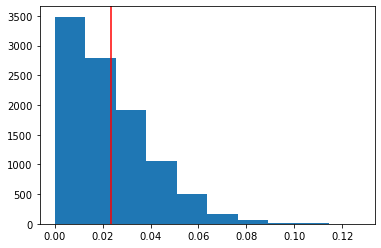

['approaches', 'neargrass', 'nearpedestrian', 0.4197]
_____________________________________________


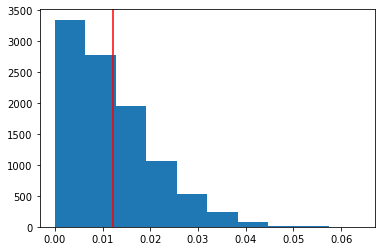

['approaches', 'neargrass', 'nearwater', 0.4145]
_____________________________________________


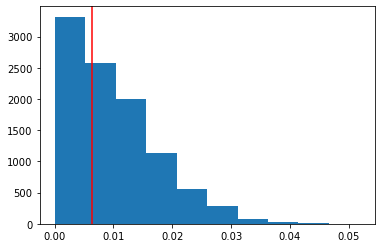

['approaches', 'neargrass', 'nearwoods', 0.622]
_____________________________________________


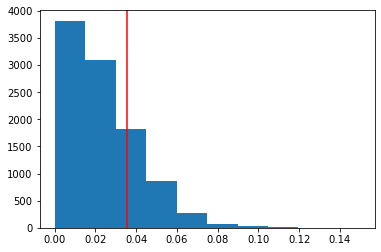

['approaches', 'nearpedestrian', 'nearwater', 0.2289]
_____________________________________________


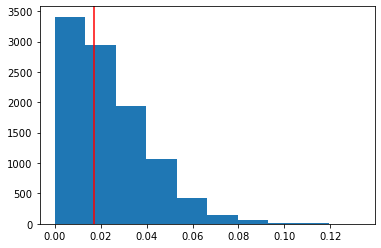

['approaches', 'nearpedestrian', 'nearwoods', 0.5653]
_____________________________________________


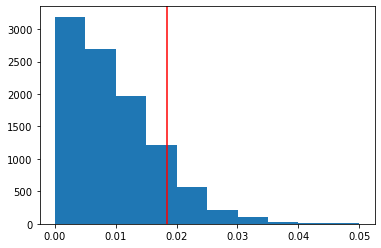

['approaches', 'nearwater', 'nearwoods', 0.1225]
_____________________________________________


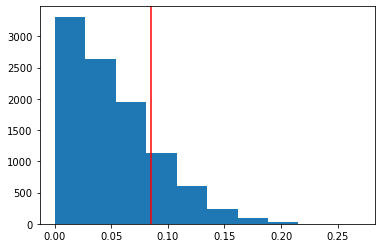

['indifferent', 'nearbuilding', 'neargarden', 0.1888]
_____________________________________________


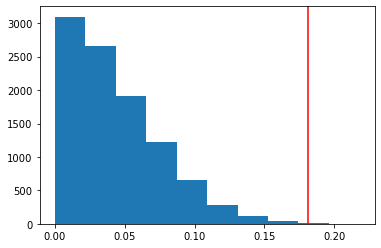

['indifferent', 'nearbuilding', 'neargrass', 0.0006]
_____________________________________________


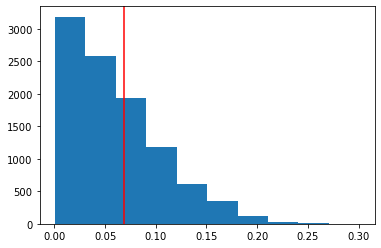

['indifferent', 'nearbuilding', 'nearpedestrian', 0.3636]
_____________________________________________


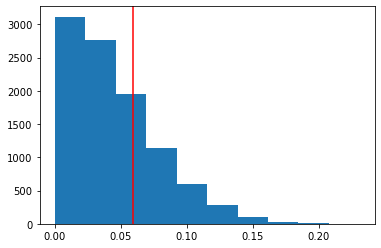

['indifferent', 'nearbuilding', 'nearwater', 0.2939]
_____________________________________________


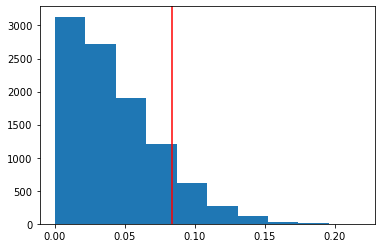

['indifferent', 'nearbuilding', 'nearwoods', 0.1183]
_____________________________________________


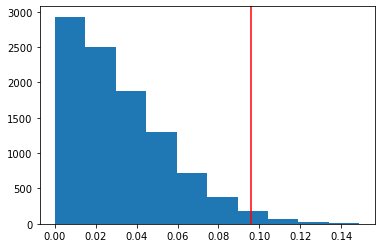

['indifferent', 'neargarden', 'neargrass', 0.0174]
_____________________________________________


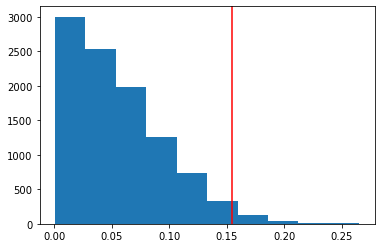

['indifferent', 'neargarden', 'nearpedestrian', 0.0222]
_____________________________________________


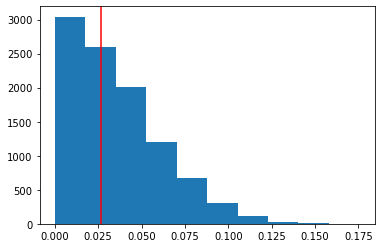

['indifferent', 'neargarden', 'nearwater', 0.5572]
_____________________________________________


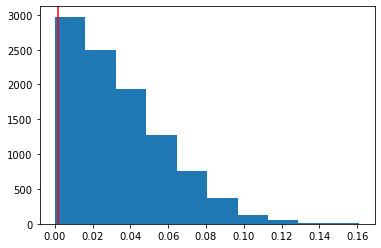

['indifferent', 'neargarden', 'nearwoods', 0.973]
_____________________________________________


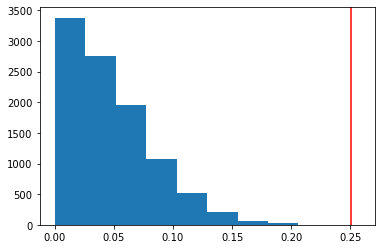

['indifferent', 'neargrass', 'nearpedestrian', 0.0001]
_____________________________________________


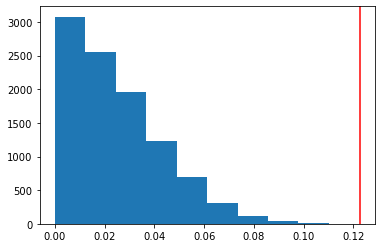

['indifferent', 'neargrass', 'nearwater', 0.0]
_____________________________________________


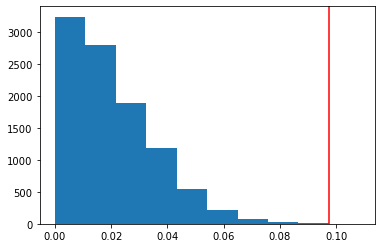

['indifferent', 'neargrass', 'nearwoods', 0.0002]
_____________________________________________


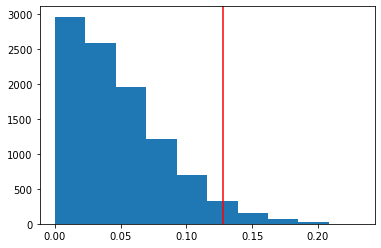

['indifferent', 'nearpedestrian', 'nearwater', 0.0379]
_____________________________________________


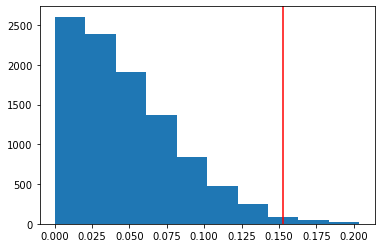

['indifferent', 'nearpedestrian', 'nearwoods', 0.0107]
_____________________________________________


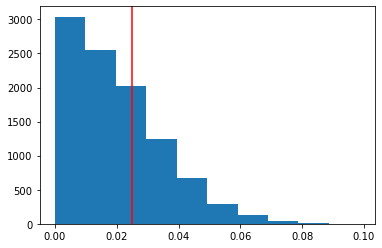

['indifferent', 'nearwater', 'nearwoods', 0.3199]
_____________________________________________


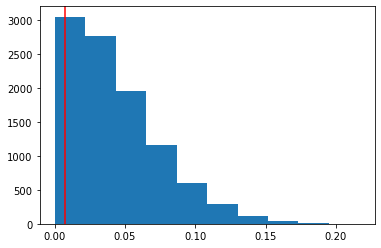

['runs_from', 'nearbuilding', 'neargarden', 0.9001]
_____________________________________________


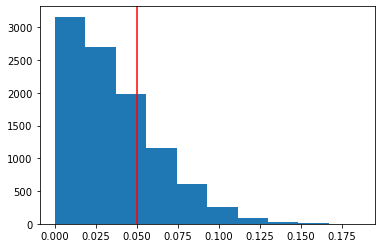

['runs_from', 'nearbuilding', 'neargrass', 0.2623]
_____________________________________________


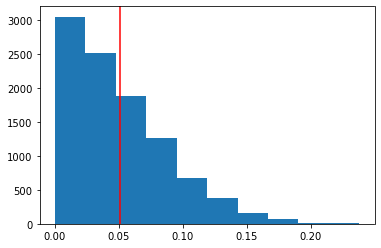

['runs_from', 'nearbuilding', 'nearpedestrian', 0.4195]
_____________________________________________


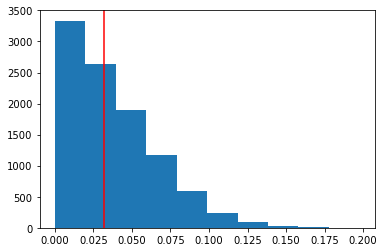

['runs_from', 'nearbuilding', 'nearwater', 0.498]
_____________________________________________


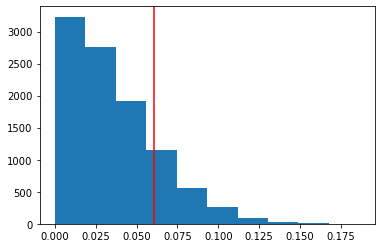

['runs_from', 'nearbuilding', 'nearwoods', 0.1753]
_____________________________________________


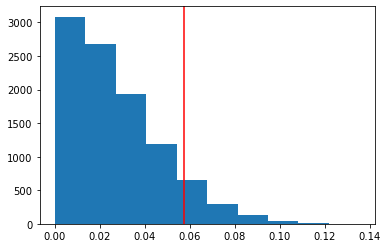

['runs_from', 'neargarden', 'neargrass', 0.0922]
_____________________________________________


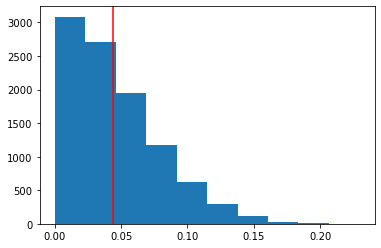

['runs_from', 'neargarden', 'nearpedestrian', 0.4442]
_____________________________________________


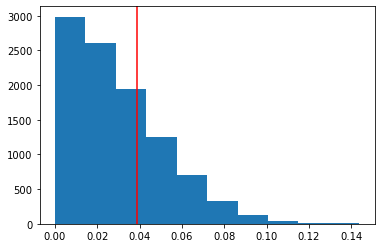

['runs_from', 'neargarden', 'nearwater', 0.2947]
_____________________________________________


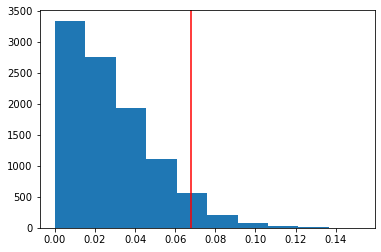

['runs_from', 'neargarden', 'nearwoods', 0.0546]
_____________________________________________


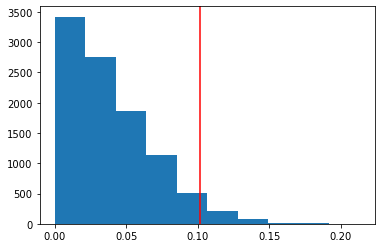

['runs_from', 'neargrass', 'nearpedestrian', 0.0397]
_____________________________________________


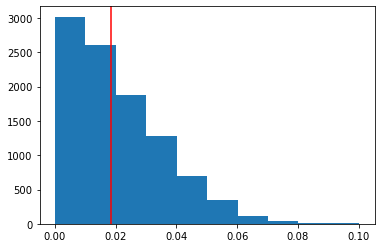

['runs_from', 'neargrass', 'nearwater', 0.4698]
_____________________________________________


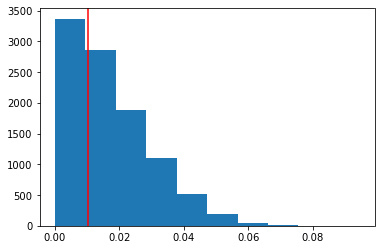

['runs_from', 'neargrass', 'nearwoods', 0.6341]
_____________________________________________


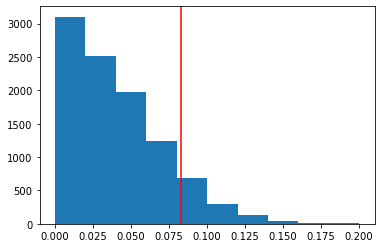

['runs_from', 'nearpedestrian', 'nearwater', 0.1064]
_____________________________________________


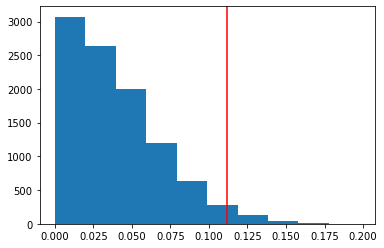

['runs_from', 'nearpedestrian', 'nearwoods', 0.026]
_____________________________________________


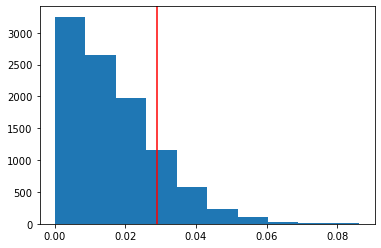

['runs_from', 'nearwater', 'nearwoods', 0.1637]
_____________________________________________


In [76]:
behaviors = ['approaches', 'indifferent', 'runs_from']
features = ['nearbuilding' ,'neargarden', 'neargrass', 'nearpedestrian', 'nearwater', 'nearwoods']

stats_rows = []

for b in behaviors:
    for i in range(len(features)):
        f1 = features[i]
        for j in range(i + 1, len(features)):
            f2 = features[j]
            behavior_df = sqrls[[b, f1, f2]]
            grouped = behavior_df.groupby(behavior_df[b]).sum()
            grouped = grouped.divide(grouped.sum(axis=0), axis=1)
            observed_stat = abs(grouped.loc[1][1] - grouped.loc[1][0])
            
            stats = np.array([])

            for i in range(10000):
                shuffled = behavior_df[b].sample(frac=1).reset_index(drop=True)
                shuffled_df = behavior_df.assign(**{'shuffled ' + b: shuffled})
                shuffled_grouped = shuffled_df.groupby('shuffled ' + b).sum()
                shuffled_grouped = shuffled_grouped.divide(shuffled_grouped.sum(axis=0), axis=1)
                shuffled_stat = abs(shuffled_grouped.loc[1][2] - shuffled_grouped.loc[1][1])
                stats = np.append(stats, shuffled_stat)
            
            plt.hist(stats)
            plt.axvline(observed_stat, color = 'red') 
            plt.show()
            
            p_value = np.mean(stats >= observed_stat)
            stats_rows.append([b, f1, f2, p_value])
            
stats_df = pd.DataFrame(stats_rows)
stats.columns=['behavior', 'feature 1', 'feature 2', 'p-value']

In [6]:
test = pd.DataFrame([[1, 'a'], [2, 'b']])
test.columns = ['a', 'b']
test

['a', 'b']

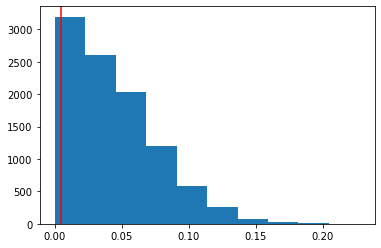

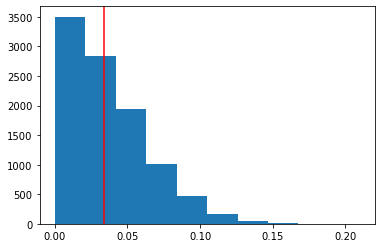

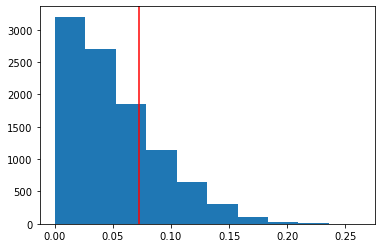

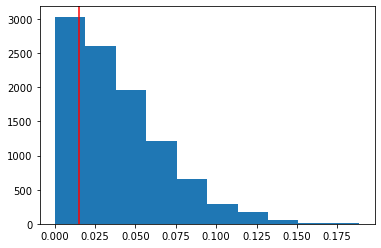

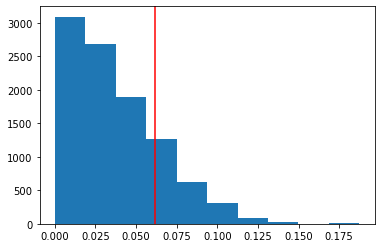

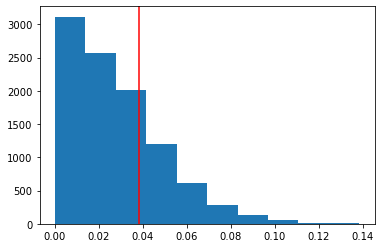

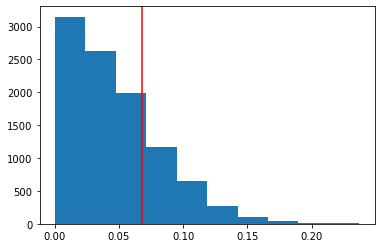

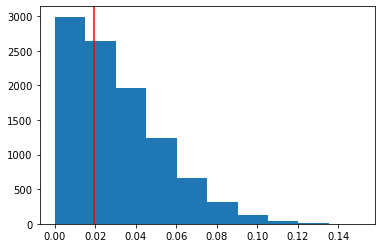

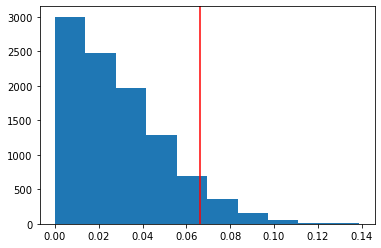

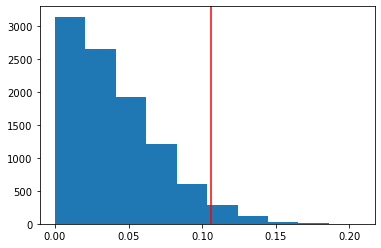

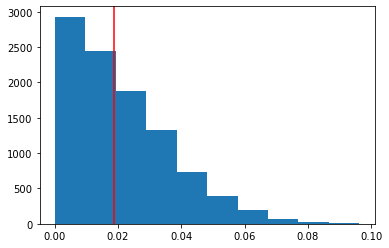

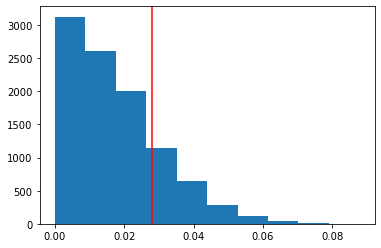

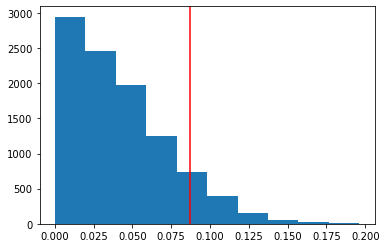

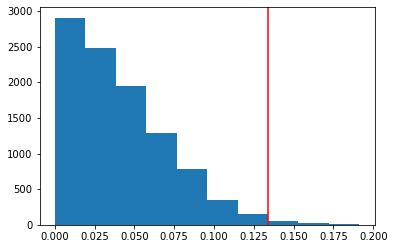

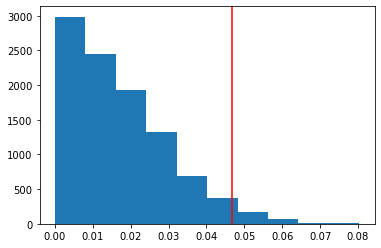

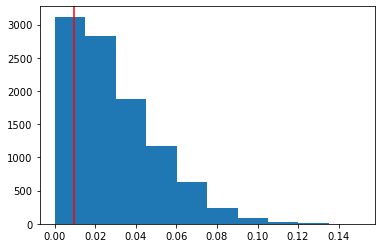

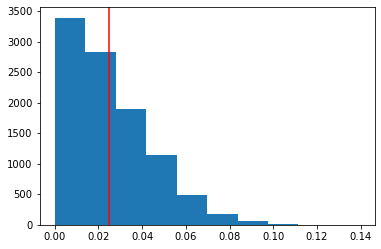

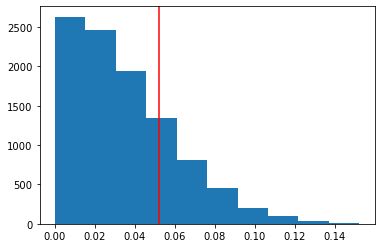

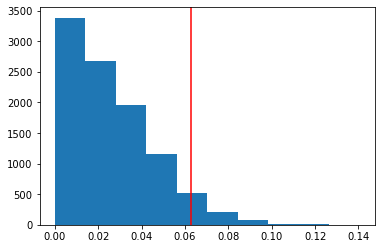

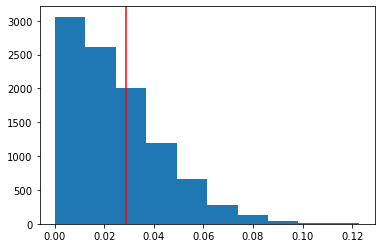

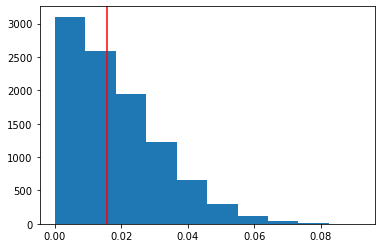

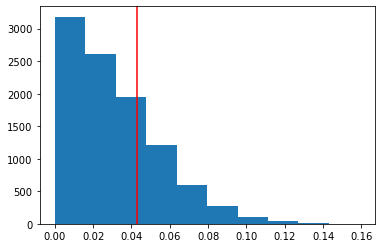

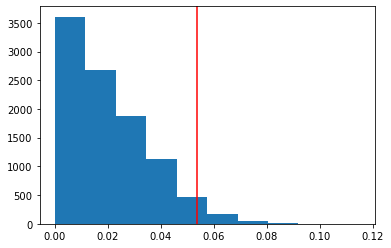

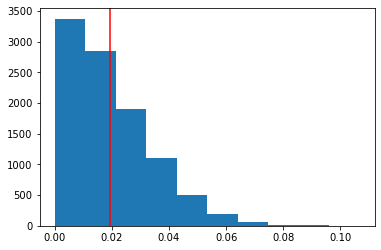

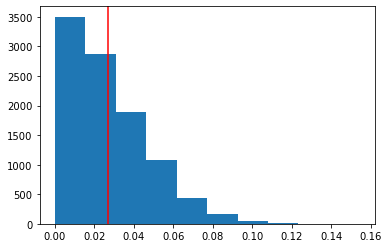

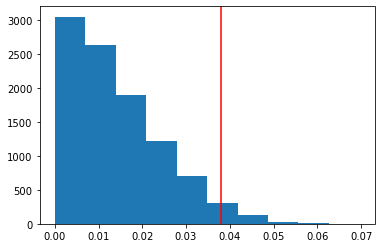

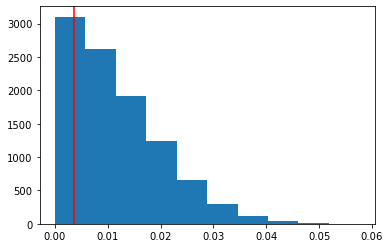

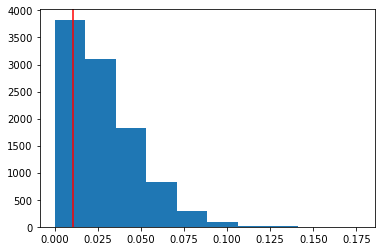

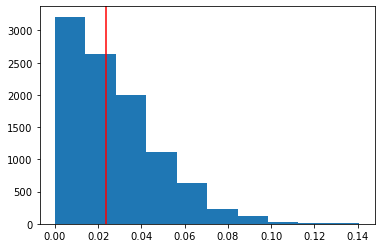

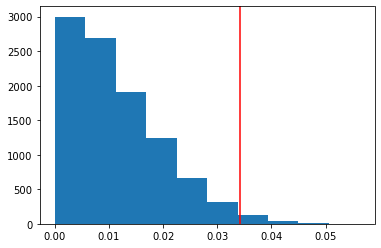

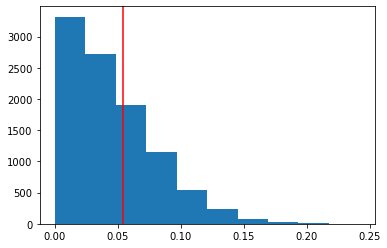

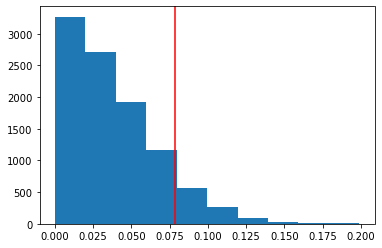

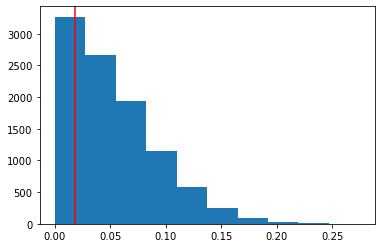

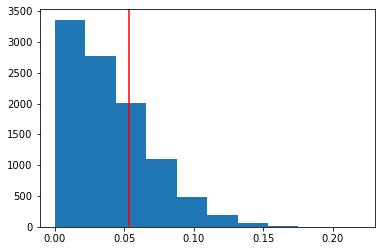

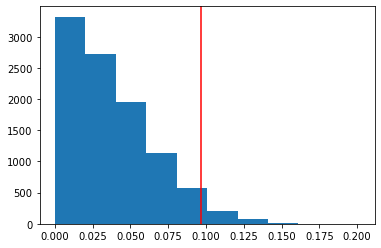

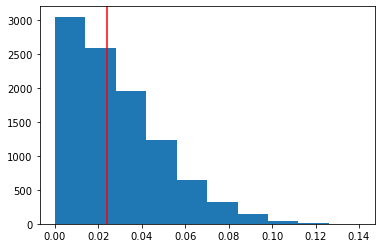

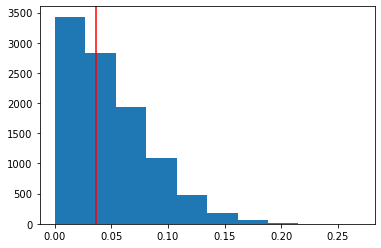

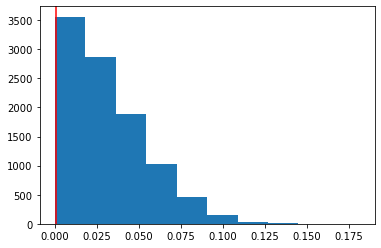

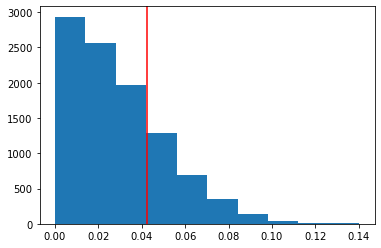

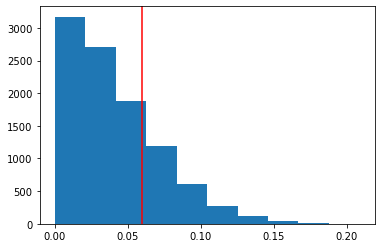

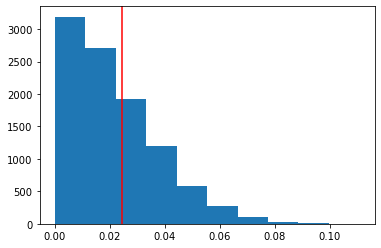

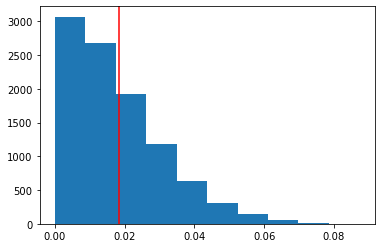

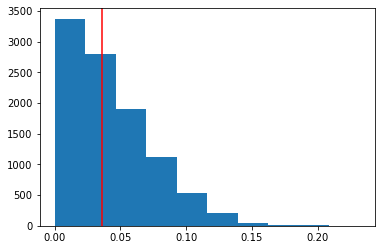

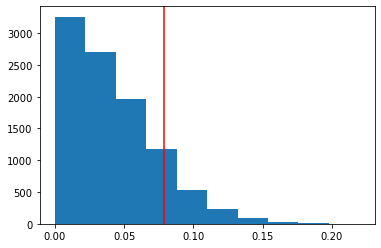

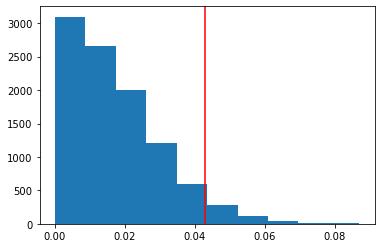

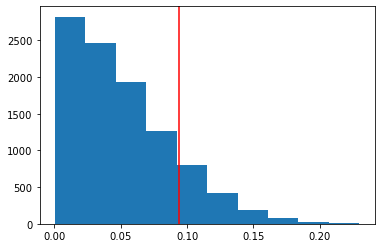

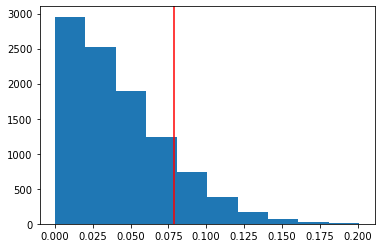

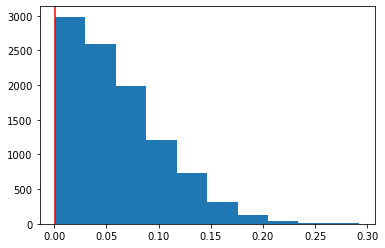

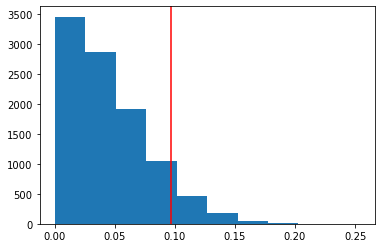

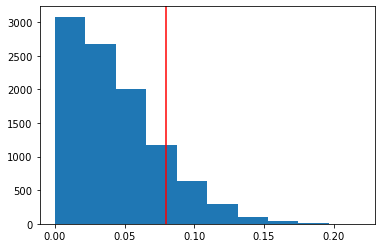

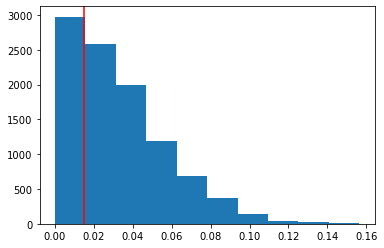

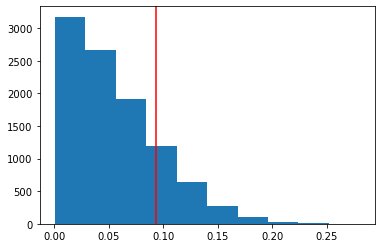

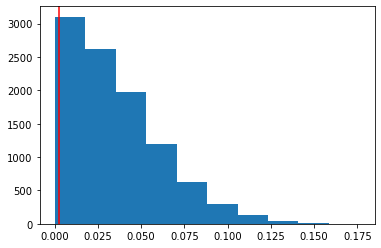

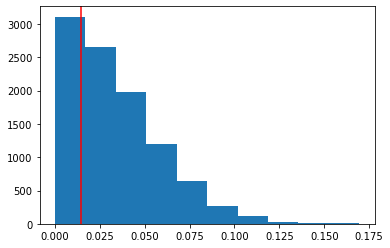

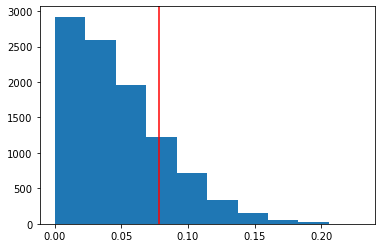

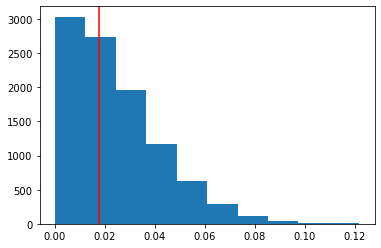

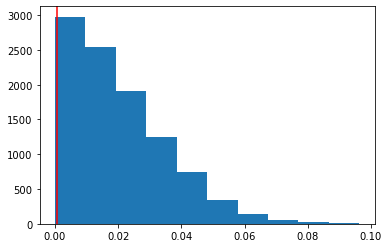

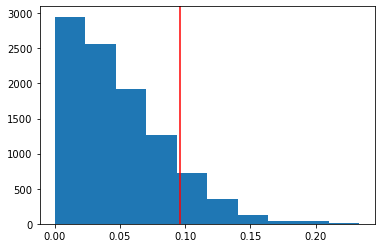

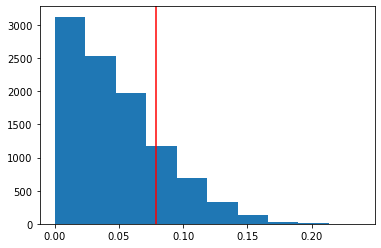

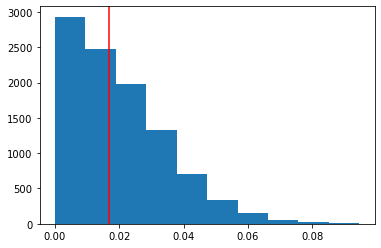

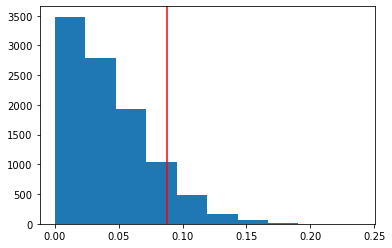

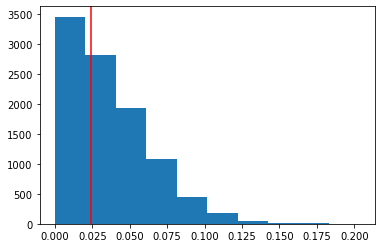

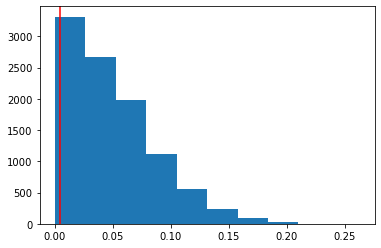

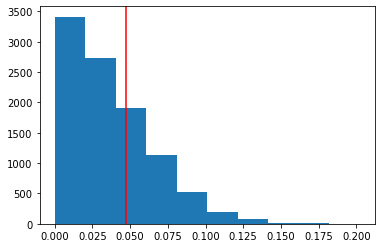

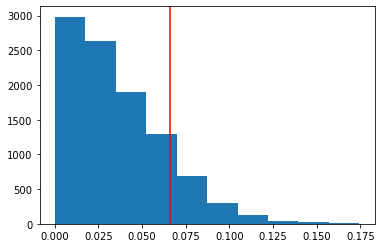

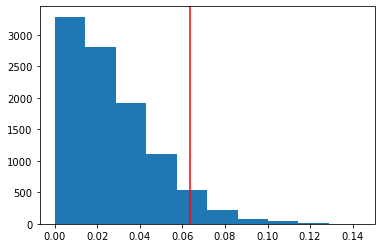

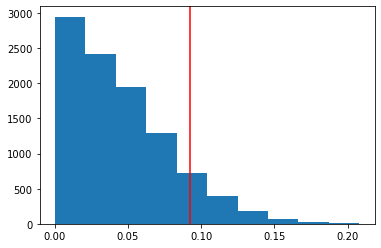

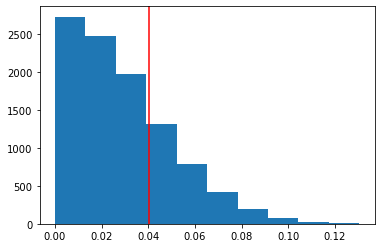

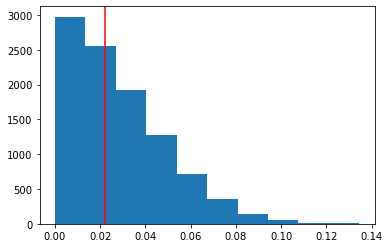

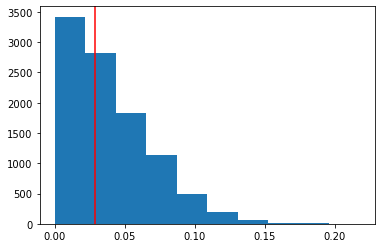

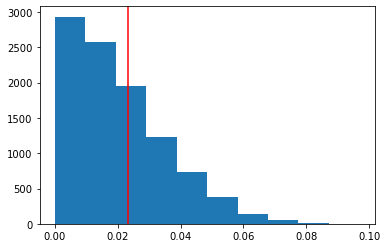

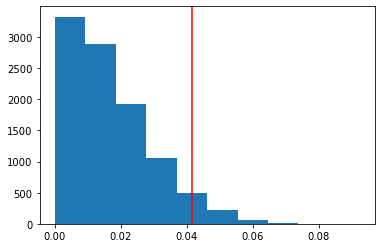

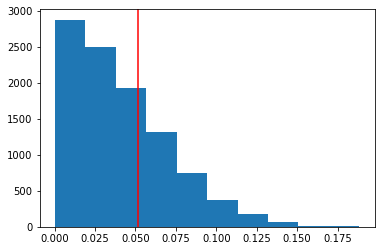

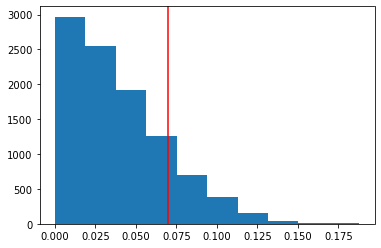

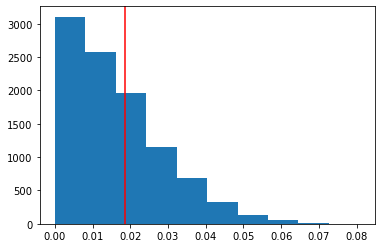

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [10]:
behaviors = ['running', 'chasing', 'eating', 'foraging', 'climbing']
features = ['nearbuilding' ,'neargarden', 'neargrass', 'nearpedestrian', 'nearwater', 'nearwoods']

stats_rows = []

for b in behaviors:
    for i in range(len(features)):
        f1 = features[i]
        for j in range(i + 1, len(features)):
            f2 = features[j]
            behavior_df = sqrls[[b, f1, f2]]
            grouped = behavior_df.groupby(behavior_df[b]).sum()
            grouped = grouped.divide(grouped.sum(axis=0), axis=1)
            observed_stat = abs(grouped.loc[1][1] - grouped.loc[1][0])
            
            stats = np.array([])

            for i in range(10000):
                shuffled = behavior_df[b].sample(frac=1).reset_index(drop=True)
                shuffled_df = behavior_df.assign(**{'shuffled ' + b: shuffled})
                shuffled_grouped = shuffled_df.groupby('shuffled ' + b).sum()
                shuffled_grouped = shuffled_grouped.divide(shuffled_grouped.sum(axis=0), axis=1)
                shuffled_stat = abs(shuffled_grouped.loc[1][2] - shuffled_grouped.loc[1][1])
                stats = np.append(stats, shuffled_stat)
            
            plt.hist(stats)
            plt.axvline(observed_stat, color = 'red') 
            plt.show()
            
            p_value = np.mean(stats >= observed_stat)
            stats_rows.append([b, f1, f2, p_value])
            
stats_df = pd.DataFrame(stats_rows)
stats_df.columns=['behavior', 'feature 1', 'feature 2', 'p-value']

In [14]:
stats_df = pd.DataFrame(stats_rows)
stats_df.columns=['behavior', 'feature 1', 'feature 2', 'p-value']

In [15]:
stats_df

,behavior,feature 1,feature 2,p-value
0,running,nearbuilding,neargarden,0.9356
1,running,nearbuilding,neargrass,0.4706
2,running,nearbuilding,nearpedestrian,0.2630
3,running,nearbuilding,nearwater,0.7562
4,running,nearbuilding,nearwoods,0.1883
...,...,...,...,...
70,climbing,neargrass,nearwater,0.3690
71,climbing,neargrass,nearwoods,0.0497
72,climbing,nearpedestrian,nearwater,0.3141
73,climbing,nearpedestrian,nearwoods,0.1575


In [16]:
first_round = pd.DataFrame([['approaches', 'nearbuilding', 'neargarden', 0.526],
                           ['approaches', 'nearbuilding', 'neargrass', 0.973],
                           ['approaches', 'nearbuilding', 'nearpedestrian', 0.4921],
                           ['approaches', 'nearbuilding', 'nearwater', 0.7004],
                           ['approaches', 'nearbuilding', 'nearwoods', 0.7786],
                           ['approaches', 'neargarden', 'neargrass', 0.2793],
                           ['approaches', 'neargarden', 'nearpedestrian', 0.1832],
                           ['approaches', 'neargarden', 'nearwater', 0.6826],
                           ['approaches', 'neargarden', 'nearwoods', 0.1865],
                           ['approaches', 'neargrass', 'nearpedestrian', 0.4197],
                           ['approaches', 'neargrass', 'nearwater', 0.4145],
                           ['approaches', 'neargrass', 'nearwoods', 0.622],
                           ['approaches', 'nearpedestrian', 'nearwater', 0.2289],
                           ['approaches', 'nearpedestrian', 'nearwoods', 0.5653],
                           ['approaches', 'nearwater', 'nearwoods', 0.1225],
                           ['indifferent', 'nearbuilding', 'neargarden', 0.1888],
                           ['indifferent', 'nearbuilding', 'neargrass', 0.0006],
                           ['indifferent', 'nearbuilding', 'nearpedestrian', 0.3636],
                           ['indifferent', 'nearbuilding', 'nearwater', 0.2939],
                           ['indifferent', 'nearbuilding', 'nearwoods', 0.1183],
                           ['indifferent', 'neargarden', 'neargrass', 0.0174],
                           ['indifferent', 'neargarden', 'nearpedestrian', 0.0222],
                           ['indifferent', 'neargarden', 'nearwater', 0.5572],
                           ['indifferent', 'neargarden', 'nearwoods', 0.973],
                           ['indifferent', 'neargrass', 'nearpedestrian', 0.0001],
                           ['indifferent', 'neargrass', 'nearwater', 0.0],
                           ['indifferent', 'neargrass', 'nearwoods', 0.0002],
                           ['indifferent', 'nearpedestrian', 'nearwater', 0.0379],
                           ['indifferent', 'nearpedestrian', 'nearwoods', 0.0107],
                           ['indifferent', 'nearwater', 'nearwoods', 0.3199],
                           ['runs_from', 'nearbuilding', 'neargarden', 0.9001],
                           ['runs_from', 'nearbuilding', 'neargrass', 0.2623],
                           ['runs_from', 'nearbuilding', 'nearpedestrian', 0.4195],
                           ['runs_from', 'nearbuilding', 'nearwater', 0.498],
                           ['runs_from', 'nearbuilding', 'nearwoods', 0.1753],
                           ['runs_from', 'neargarden', 'neargrass', 0.0922],
                           ['runs_from', 'neargarden', 'nearpedestrian', 0.4442],
                           ['runs_from', 'neargarden', 'nearwater', 0.2947],
                           ['runs_from', 'neargarden', 'nearwoods', 0.0546],
                           ['runs_from', 'neargrass', 'nearpedestrian', 0.0397],
                           ['runs_from', 'neargrass', 'nearwater', 0.4698],
                           ['runs_from', 'neargrass', 'nearwoods', 0.6341],
                           ['runs_from', 'nearpedestrian', 'nearwater', 0.1064], 
                           ['runs_from', 'nearpedestrian', 'nearwoods', 0.026],
                           ['runs_from', 'nearwater', 'nearwoods', 0.1637]])
first_round.columns=['behavior', 'feature 1', 'feature 2', 'p-value']

In [19]:
final_stats = pd.read_csv('/Users/candusshi/projects/nycsquirrels/nyc-squirrels/dataframes/permutation_results.csv')

final_stats = final_stats.drop(columns = 'Unnamed: 0')

sig = final_stats[final_stats['p-value'] < 0.05]


,feature 1,feature 2,p-value
behavior,,,
climbing,1,1,1
eating,2,2,2
chasing,3,3,3
running,3,3,3
runs_from,3,3,3
indifferent,8,8,8


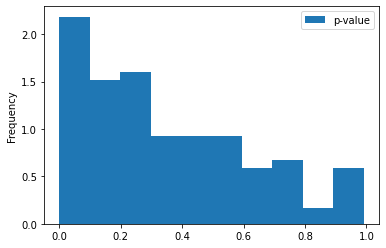

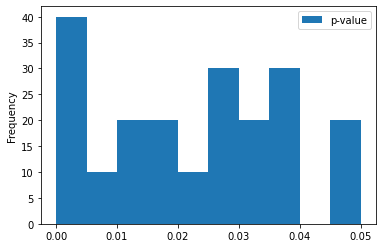

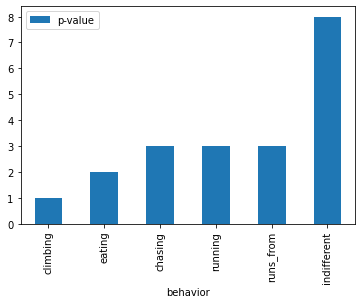

In [31]:
final_stats.plot(kind='hist', y='p-value', density=True)
sig.plot(kind='hist', y='p-value', density=True, bins=np.arange(0, 0.051, 0.005))
behavior = sig.groupby('behavior').count().sort_values(by='p-value')
behavior.plot(kind='bar', y='p-value')
behavior

In [24]:
final_stats = pd.concat([stats_df, first_round])
final_stats[final_stats['p-value'] < 0.05]

,behavior,feature 1,feature 2,p-value
9,running,neargrass,nearpedestrian,0.0410
13,running,nearpedestrian,nearwoods,0.0078
14,running,nearwater,nearwoods,0.0281
22,chasing,neargarden,nearwater,0.0353
25,chasing,neargrass,nearwater,0.0340
29,chasing,nearwater,nearwoods,0.0176
34,eating,nearbuilding,nearwoods,0.0402
44,eating,nearwater,nearwoods,0.0473
71,climbing,neargrass,nearwoods,0.0497
16,indifferent,nearbuilding,neargrass,0.0006


In [33]:
bfsqrls = pd.read_csv('/Users/candusshi/projects/nycsquirrels/nyc-squirrels/dataframes/bfsqrls.csv')

In [35]:
bfsqrls

,Unnamed: 0,long,lat,geometry,approaches,indifferent,runs_from,running,chasing,climbing,...,quaas,moans,tail_flags,tail_twitches,nearbuilding,neargarden,neargrass,nearpedestrian,nearwater,nearwoods
0,0,-73.956134,40.794082,POINT (-73.9561344937861 40.7940823884086),0,0,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True
1,1,-73.957044,40.794851,POINT (-73.9570437717691 40.7948509408039),0,0,1,1,0,0,...,0,0,0,0,False,False,False,False,True,True
2,2,-73.975725,40.769703,POINT (-73.9757249834141 40.7697032606755),0,0,1,0,0,1,...,0,0,0,0,False,False,True,False,False,False
3,3,-73.956570,40.790256,POINT (-73.9565700386162 40.7902561000937),0,0,0,0,0,0,...,0,0,0,0,False,False,True,False,False,False
4,4,-73.960261,40.794288,POINT (-73.9602609920814 40.7942883045566),0,0,1,0,0,0,...,0,0,0,0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,1785,-73.966557,40.780435,POINT (-73.9665572004288 40.7804347548303),0,1,0,0,0,0,...,0,0,0,0,False,False,True,False,False,False
1786,1786,-73.975646,40.770356,POINT (-73.9756457597888 40.7703559775625),0,0,1,0,1,0,...,0,0,0,1,False,False,True,False,False,False
1787,1787,-73.966290,40.784330,POINT (-73.9662895079734 40.7843300758044),0,1,0,0,0,1,...,0,0,0,0,False,False,False,False,True,False
1788,1788,-73.966587,40.783678,POINT (-73.9665871993517 40.7836775064883),0,1,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True


In [38]:
behaviors = ['approaches', 'indifferent', 'runs_from', 'running', 'chasing', 'climbing', 'foraging', 'eating']

for b in behaviors:
    print(bfsqrls[b].value_counts(normalize=True))


0    0.937989
1    0.062011
Name: approaches, dtype: float64
0    0.510615
1    0.489385
Name: indifferent, dtype: float64
0    0.778212
1    0.221788
Name: runs_from, dtype: float64
0    0.760894
1    0.239106
Name: running, dtype: float64
0    0.910615
1    0.089385
Name: chasing, dtype: float64
0    0.77933
1    0.22067
Name: climbing, dtype: float64
0    0.52067
1    0.47933
Name: foraging, dtype: float64
0    0.746927
1    0.253073
Name: eating, dtype: float64
